# Initial system setup

When using this notebook in your *local* Jupyter, follow these steps to set up your system:

- install [Graphviz](https://graphviz.org/download/) for the graph rendering.
- install the library descriptor `tag.json` from https://raw.githubusercontent.com/HuygensING/tag-jupyter/master/tag.json in `<UserHome>/.jupyter_kotlin/libraries`
- restart this notebook.

# Setting up the TAG environment

In [1]:
%use tag

Welcome to TAG
Using GraphViz: dot - graphviz version 2.44.1 (20200629.0846)



# Tokenizing a TAGML text

In [4]:
val tokens = TAG.tokenize(Paths.get("tag-for-CHR2.tagml"))
tokens.joinToString("\n")

Range{1:1 - 16:4} [!{":ontology":{"root":"tagml","elements":{"tagml":{"description":"root element and selected syntax"},"l":{"description":"line on document pages"},"s":{"description":"sentence in text"}}}}!]
Range{18:1 - 18:14} [tagml|+A,+B>
Range{18:14 - 18:19} [l|A>
Range{18:19 - 18:24} [s|B>
Range{18:24 - 18:59} Het is duidelijk, dat de onder deze
Range{18:59 - 18:62} <l]
Range{18:62 - 18:67} [l|A>
Range{18:67 - 18:118} aantallen vallende beroepsbeoefenaren niet alle als
Range{18:118 - 18:121} <l]
Range{18:121 - 18:126} [l|A>
Range{18:126 - 18:170} "moeilijk misbaar" kunnen worden aangemerkt.
Range{18:170 - 18:173} <s]
Range{18:173 - 18:176} <l]
Range{18:176 - 18:183} <tagml]
Range{18:176 - 18:183} <tagml]

# Constructing the Multi-Colored Tree from the tokens

In [5]:
val mct = tokens.asMCT()
mct.nodes.forEach{println(it)}

Markup(tagml|A, B)
Markup(l|A)
Markup(s|B)
Text(Het is duidelijk, dat de onder deze)
Markup(l|A)
Text(aantallen vallende beroepsbeoefenaren niet alle als)
Markup(l|A)
Text("moeilijk misbaar" kunnen worden aangemerkt.)


# Visualizing the MCT

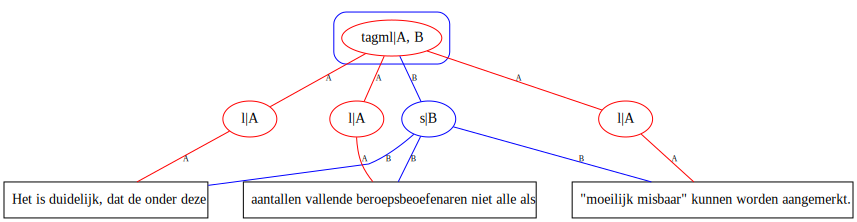

In [7]:
mct.show()

# How parsing errors & warnings are shown

In [ ]:
val tokens = TAG.tokenize(File("bad.tagml"))
tokens

# TAGML with overlap

In [ ]:
val tagml = ("""
    |[!{
    |  ":ontology": {
    |    "root": "tagml"
    |  }
    |}!]
    |[tagml|+X,+Y>[x|X>Romeo [y|Y>loves<x] Juliet<y]<tagml]
    |""".trimMargin())
println(tagml)
val tokens = TAG.tokenize(tagml)
val mct = tokens.asMCT()
mct.show()

# Generating a basic header from a TAGML body

In [9]:
val body = "[tagml|+A,+B>[l|A>[s|B>Het is duidelijk, dat de onder deze<l][l|A>aantallen vallende beroepsbeoefenaren niet alle als<l][l|A>\"moeilijk misbaar\" kunnen worden aangemerkt.<s]<l]<tagml]"

val header = TAG.inferHeader(body)

println(header)

[!{
  ":ontology": {
    "root": "tagml",
    "elements": {
      "tagml": {
        "description": "..."
      },
      "l": {
        "description": "..."
      },
      "s": {
        "description": "..."
      }
    },
    "attributes": {}
  }
}!]


### Using this header, the TAGML can be parsed

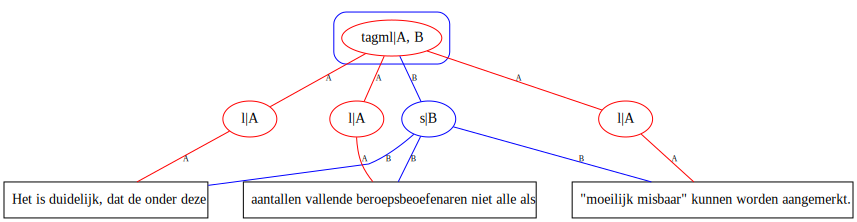

In [10]:
val tagml = header + body
val tokens = TAG.tokenize(tagml)
val mct = tokens.asMCT()
mct.show()